# Model Selection and Hyper-parameters Tunning


In [5]:
import pandas as pd

data = pd.read_csv(r'C:\Users\A To Z\Desktop\4\ML\Assignment2\data_reg.csv')

training_set = data[:120]  
validation_set = data[120:160]   
testing_set= data[160:]    


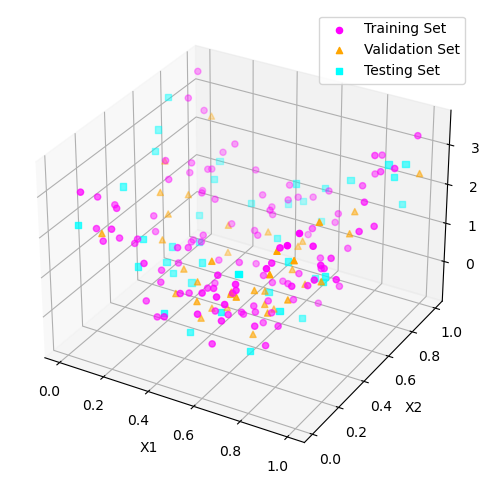

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')


ax.scatter3D(training_set['x1'], training_set['x2'], training_set['y'], color='magenta', marker='o', label='Training Set')
ax.scatter3D(validation_set['x1'], validation_set['x2'], validation_set['y'], color='orange', marker= '^', label='Validation Set')
ax.scatter3D(testing_set['x1'], testing_set['x2'], testing_set['y'], color='cyan', marker='s', label='Testing Set')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.show()


# 2

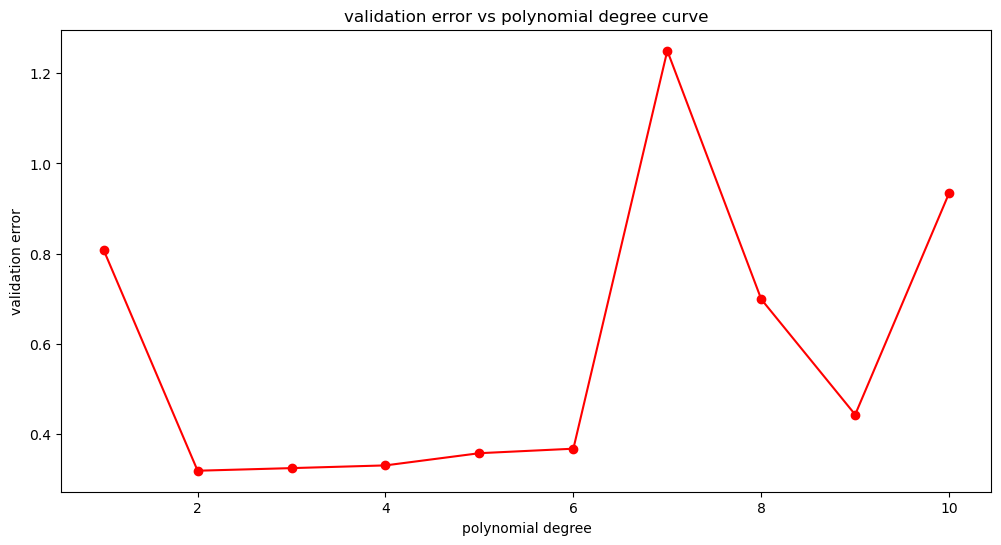

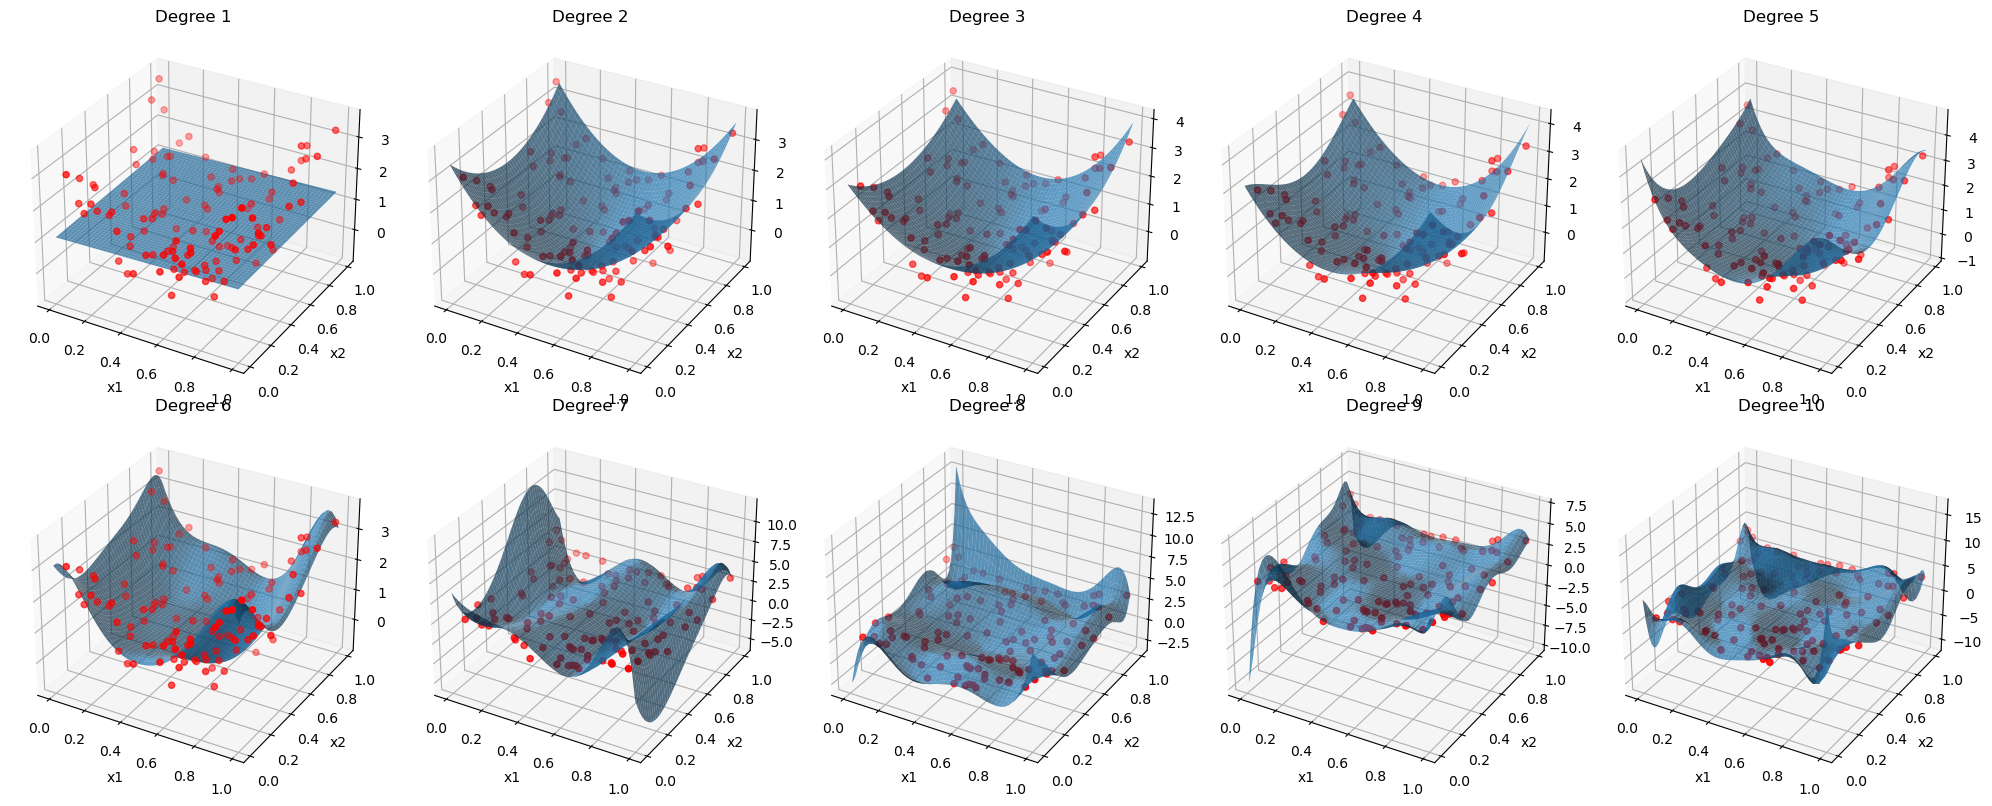

Best Degree=2,validation error=0.3184662039345489


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error


#Dividing features and target for training_set and validation_sets 
X_train = training_set[['x1', 'x2']]
y_train = training_set['y']
X_val = validation_set[['x1', 'x2']]
y_val = validation_set['y']

#lists to store models and their errors
degrees = range(1, 11)
models = []
errors = []

for degree in degrees:
    # transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # fit a linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append(model)

    # predict on the validation_sets and calculate mean_absolute_error
    y_val_pred = model.predict(X_val_poly)
    mse = mean_absolute_error(y_val, y_val_pred)
    errors.append(mse)

plt.figure(figsize=(12,6))
plt.plot(degrees, errors, marker='o',color='r')
plt.xlabel('polynomial degree')
plt.ylabel('validation error')
plt.title('validation error vs polynomial degree curve')
plt.show()

# plot the surface of the learned function alongside with the training examples on the same plot
fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw={'projection': '3d'})
axs = axs.ravel()

for ax, degree, model in zip(axs, degrees, models):
    # creating a grid for plotting
    x1_grid, x2_grid = np.meshgrid(np.linspace(X_train['x1'].min(), X_train['x1'].max(), 50), np.linspace(X_train['x2'].min(), X_train['x2'].max(), 50))
    grid = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T
    grid_poly = PolynomialFeatures(degree=degree).fit_transform(grid)

    # predicting on the grid and reshaping for plotting
    y_grid_pred = model.predict(grid_poly).reshape(x1_grid.shape)

    # Plotting the surface and training data points
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.7)
    ax.scatter(X_train['x1'], X_train['x2'], y_train, color='r', marker='o')
    ax.set_title(f'Degree {degree}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plt.tight_layout()
plt.show()

# The degree with the lowest validation error is typically considered the best.
best_degree = degrees[np.argmin(errors)]#np.argmin(errors) --> find index to minimum error in errors list
print(f"Best Degree={best_degree},validation error={ min(errors)}")


# 3

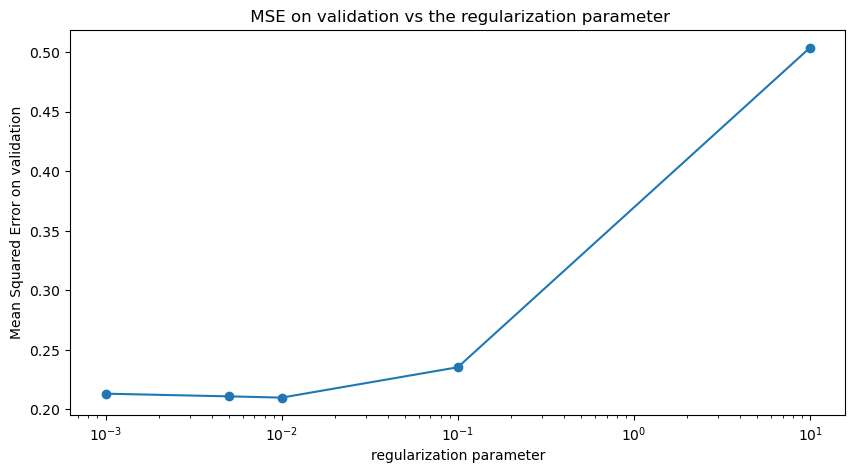

Best Regularization Parameter=0.01,Mean Squared Error on validation=0.20996554038850457


In [8]:
from sklearn.linear_model import Ridge


regularization_parameter = [0.001, 0.005, 0.01, 0.1, 10]

#transform features to polynomial features with degree=8
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

#lists to store models and mse
ridge_models = []
ridge_MSE = []

#ridge regression models for each regularization parameter
for alpha in regularization_parameter:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)
    
    # predict on the validation_set and calculate MSE
    y_val_pred = ridge_model.predict(X_val_poly)
    MSE = mean_squared_error(y_val, y_val_pred)
    ridge_MSE.append(MSE)

plt.figure(figsize=(10,5))
plt.plot(regularization_parameter, ridge_MSE, marker='o')
plt.xlabel('regularization parameter')
plt.ylabel('Mean Squared Error on validation')
plt.title(' MSE on validation vs the regularization parameter')
plt.xscale('log')  #scale to logarithmic for better visualization
plt.show()

# The regularization_parameter with the lowest vMSE on validation is typically considered the best.
best_regularization_parameter = regularization_parameter[np.argmin(ridge_MSE)]#np.argmin(errors) --> find index to minimum error in errors list
print(f"Best Regularization Parameter={best_regularization_parameter},Mean Squared Error on validation={ min(ridge_MSE)}")



# Logistic Regression


# 1

C:\Users\A To Z\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


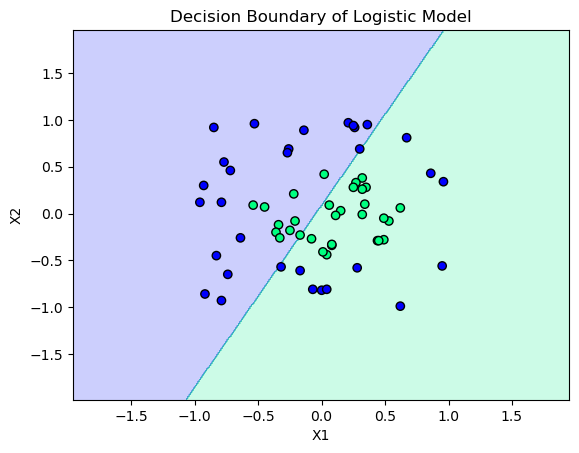

Training Accuracy = 0.6612903225806451
Testing Accuracy = 0.6818181818181818


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

Training = pd.read_csv(r'C:\Users\A To Z\Desktop\4\ML\Assignment2\train_cls.csv')
Testing = pd.read_csv(r'C:\Users\A To Z\Desktop\4\ML\Assignment2\test_cls.csv')

features=['x1', 'x2']
#extracting the features and target from the training data
X_train = Training[features].astype(float)
y_train = Training['class'].map({'C1': 0, 'C2': 1}).astype(int)

#extracting the features and target from the test data
X_test = Testing[features].astype(float)
y_test = Testing['class'].map({'C1': 0, 'C2': 1}).astype(int)


Logistic_model = LogisticRegression()

# Train the logistic regression model on the training data
Logistic_model.fit(X_train, y_train)


# defining the range for plotting the decision boundary
x_min, x_max = X_train[features[0]].min() - 1, X_train[features[0]].max() + 1
y_min, y_max = X_train[features[1]].min() - 1, X_train[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predicting class labels for all points on the decision boundary
Z = Logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=.2, cmap='winter')
plt.scatter(X_train[features[0]], X_train[features[1]], c=y_train, cmap='winter', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary of Logistic Model')
plt.show()


# making predictions and calculate the accuracy on the training data and testing data
train_predict = Logistic_model.predict(X_train)
train_accuracy= accuracy_score(y_train, train_predict)

test_predict = Logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predict)

print("Training Accuracy =",train_accuracy)
print("Testing Accuracy =",test_accuracy)



# 2

C:\Users\A To Z\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


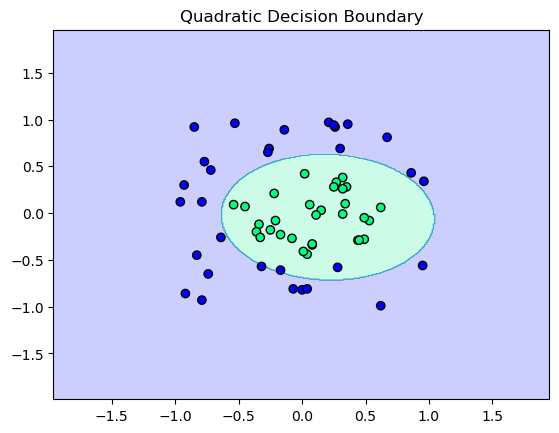

Training Accuracy= 0.967741935483871
Testing Accuracy= 0.9545454545454546


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# create Polynomial Features object with degree=2
poly_features = PolynomialFeatures(degree=2)

# create a pipeline that applies polynomial feature transformation followed by logistic regression
quadratic_logistic= Pipeline([('quad_features', poly_features), ('logistic_regression', LogisticRegression())])

# fiting the pipeline on the training data
quadratic_logistic.fit(X_train, y_train)


# Function to plot the decision boundary of the model
def plot_decision_boundary(model, X, y, title):
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # defining the mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2,cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',cmap='winter')
    plt.title(title)
    plt.show()

# call the plot_decision_boundary function to visualize the decision boundary on the training data
plot_decision_boundary(quadratic_logistic, X_train, y_train, 'Quadratic Decision Boundary')


train_predict_quadratic = quadratic_logistic.predict(X_train)
train_accuracy_quadratic = accuracy_score(y_train, train_predict_quadratic)

test_predict_quadratic = quadratic_logistic.predict(X_test)
test_accuracy_quadratic = accuracy_score(y_test, test_predict_quadratic)


print("Training Accuracy=",train_accuracy_quadratic)
print("Testing Accuracy=",test_accuracy_quadratic)


# 3